In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
iris = load_iris()

In [6]:


iris_std = StandardScaler().fit_transform(iris.data)
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

In [7]:
df = pd.DataFrame(iris.data, columns = ['sl','sw','pl','pw'])
df['PC1'] = iris_pca[:,0]
df['PC2'] = iris_pca[:,1]
df.head()

,sl,sw,pl,pw,PC1,PC2
0,5.1,3.5,1.4,0.2,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,-2.389842,0.646835


- k-mean 모델 생성

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [9]:
# 정규분포데이터를 먼저 학습
kmeans.fit(iris_std)

KMeans(n_clusters=3, random_state=2021)

In [10]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [11]:
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.head()

,sl,sw,pl,pw,PC1,PC2,target,cluster
0,5.1,3.5,1.4,0.2,-2.264703,0.480027,0,1
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134,0,1
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908,0,1
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395,0,1
4,5.0,3.6,1.4,0.2,-2.389842,0.646835,0,1


In [12]:
df.groupby(['target','cluster']).count()

sl  sw  pl  pw  PC1  PC2
target cluster                          
0      1        50  50  50  50   50   50
1      0        11  11  11  11   11   11
       2        39  39  39  39   39   39
2      0        36  36  36  36   36   36
       2        14  14  14  14   14   14

- 데이터시각화

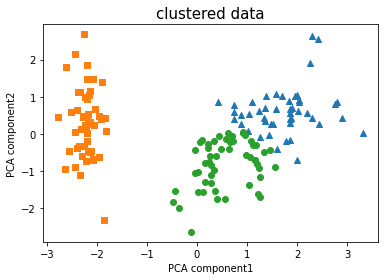

In [14]:
# 군집화한 결과를 차원축소하여 시각화
markers = ['^', 's','o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster==i]['PC1']
    y_axis_data = df[df.cluster==i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker )
plt.xlabel('PCA component1')
plt.ylabel('PCA component2')
plt.title('clustered data', fontsize=15)
plt.show()

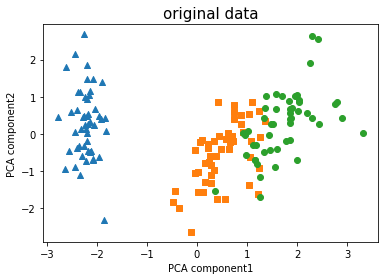

In [15]:
for i, marker in enumerate(markers):
    x_axis_data = df[df.target==i]['PC1']
    y_axis_data = df[df.target==i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker )
plt.xlabel('PCA component1')
plt.ylabel('PCA component2')
plt.title('original data', fontsize=15)
plt.show()

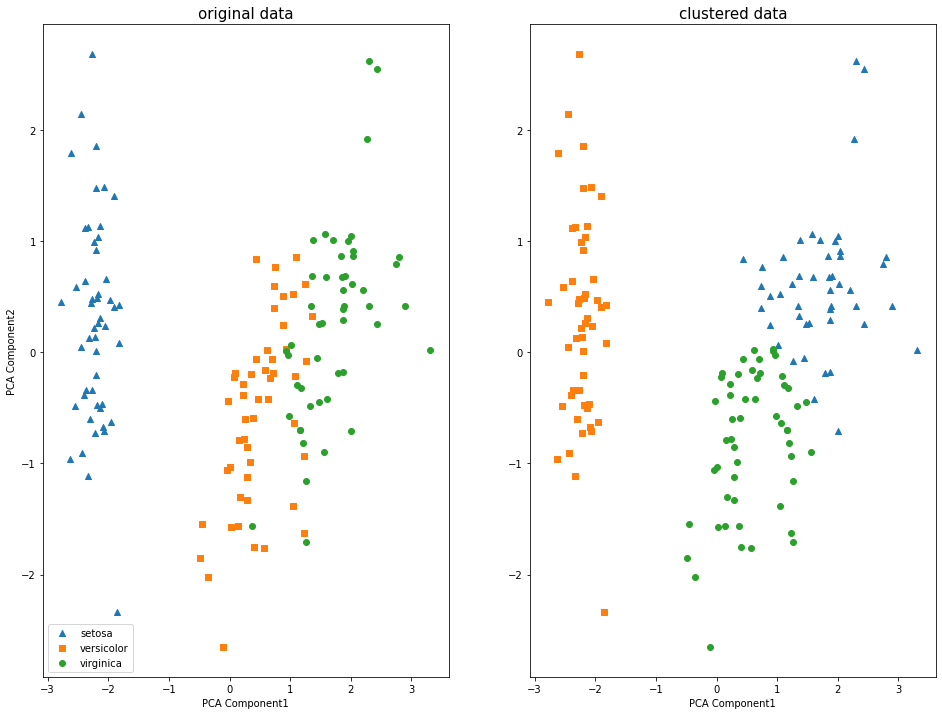

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,12))

for k, column in enumerate(['target','cluster']):
    ax=axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column]==i]['PC1']
        y_axis_data = df[df[column]==i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i] )
    if k ==0 :
        ax.set_title('original data', fontsize=15)
        ax.set_ylabel('PCA Component2')
        ax.legend()
    else:
        ax.set_title('clustered data', fontsize=15)
    ax.set_xlabel('PCA Component1')

plt.show()

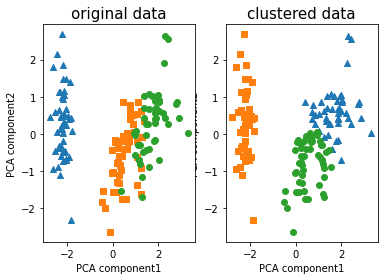

In [52]:
markers = ['^', 's','o']

plt.subplot(1,2,2)
for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster==i]['PC1']
    y_axis_data = df[df.cluster==i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker )
plt.xlabel('PCA component1')
plt.ylabel('PCA component2')
plt.title('clustered data', fontsize=15)

plt.subplot(1,2,1)
for i, marker in enumerate(markers):
    x_axis_data = df[df.target==i]['PC1']
    y_axis_data = df[df.target==i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker )
plt.xlabel('PCA component1')
plt.ylabel('PCA component2')
plt.title('original data', fontsize=15)
plt.show()